In [2]:
from api_neurotask import *
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and Filter Data

Before diving into the analysis, it's essential to load the dataset and preprocess it. In this step, we'll filter out non-reward trials to focus our analysis on the relevant data.

Remove trials with outcomes: Aborted (A), Incomplete (I), Failed (F)

Also, return the bin size of the dataset in ms

In [5]:
parquet_file_path = 'data/2_10_Chowdhury_CObump.parquet'
df,bin = load_and_filter_parquet(parquet_file_path,['A', 'I','F'])

Data loaded from data/2_10_Chowdhury_CObump.parquet with bin size of 1e+01 ms
Events columns: ['EventTarget_Onset', 'EventGo_cue', 'EventBump']
Covariates columns: ['hand_pos_x', 'hand_pos_y', 'hand_vel_x', 'hand_vel_y', 'bump_dir', 'target_dir']


In [40]:
parquet_file_path = 'data/6_1_Churchland1_Maze.parquet'
df,bin = load_and_filter_parquet(parquet_file_path,['A', 'I','F'])

Data loaded from data/6_1_Churchland1_Maze.parquet with bin size of 1 ms
Events columns: ['EventGo_cue', 'EventMovement_end', 'EventMovement_start']
Covariates columns: ['hand_pos_x', 'hand_pos_y', 'cursor_pos_x', 'cursor_pos_y', 'target_pos_x', 'target_pos_y', 'maze_num_target', 'maze_num_barriers', 'cursor_vel_x', 'cursor_vel_y']


In [42]:
df.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,result,cursor_vel_x,cursor_vel_y,datasetID,session,animal,task,EventGo_cue,EventMovement_end,EventMovement_start
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,R,0.000000e+00,0.000000,6,1,1,Maze,False,False,False
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,R,-4.568800e-01,2.733010,6,1,1,Maze,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,R,-2.710778e-01,2.204541,6,1,1,Maze,False,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,R,-4.440892e-13,0.908144,6,1,1,Maze,False,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,R,2.710778e-01,-1.304669,6,1,1,Maze,False,False,False


### 2. Rebin Data for Analysis

The `rebin` function is designed to rebin a dataset by aggregating data points into larger bins based on a specified bin size. Here's a brief overview of how to use it:

The `rebin` function takes the following parameters:
- `dataset1`: The DataFrame containing the data to be rebinned.
- `prev_bin_size`: The original bin size of the data.
- `new_bin_size`: The desired bin size to aggregate data points into. This is the new bin size you want the data to be rebinned to.
- `reset` (optional): A boolean indicating whether to reset the index of the resulting DataFrame.

When called, the function aggregates data points within each bin based on the specified aggregation functions. The aggregation functions are determined based on the column names of the input DataFrame. For spiking data, the function aggregates by summing the values. For columns related to behavior, the function applies a custom decimation function to downsample the data. 


In [46]:
# Rebin the dataset with a bin size of 20 ms 
df10 = rebin(df,prev_bin_size = bin ,new_bin_size = 20)

In [47]:
df10

,session,trial_id,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,maze_num_barriers,result,cursor_vel_x,cursor_vel_y,datasetID,animal,task,EventGo_cue,EventMovement_end,EventMovement_start
0,1,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,...,0,R,-0.022844,-2.313114e+01,6,1,Maze,False,False,False
1,1,0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,...,0,R,-0.441466,-3.085505e+01,6,1,Maze,False,False,False
2,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,R,10.727887,-2.004293e+01,6,1,Maze,False,False,False
3,1,0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0,R,-4.064572,-2.917460e+01,6,1,Maze,False,False,False
4,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,R,-24.957351,-5.423423e+01,6,1,Maze,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226836,1,1586,0.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,...,7,R,5.357780,8.881784e-17,6,1,Maze,False,False,False
226837,1,1586,0.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,...,7,R,-5.740025,0.000000e+00,6,1,Maze,False,False,False
226838,1,1586,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,7,R,5.445517,-7.944189e-10,6,1,Maze,False,False,False
226839,1,1586,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,7,R,-3.096495,0.000000e+00,6,1,Maze,False,False,False


### 3. Align to specific event

Before using the `align_event` function, it's essential to understand its purpose and how it operates. This function is designed to align events within a DataFrame based on a specified start event marker. Here's a brief overview of how to use it:

The `align_event` function takes the following parameters:
- `df`: The DataFrame containing the data.
- `bin_size`: the bin size of the data in ms.
- `start_event`: The event marker indicating the start of a trial or session.
- `offset_min` (optional): The minimum offset (in ms) to consider before the start_event.
- `offset_max` (optional): The maximum offset (in ms) to consider after the start_event.


Please note that for Dataset 1, it's not possible to align events since it doesn't contain event information.

Chowdhury

In [15]:
[col for col in df.columns if col.startswith('Event')]

['EventTarget_Onset', 'EventGo_cue', 'EventBump']

Churchland

In [ ]:
[col for col in df.columns if col.startswith('Event')]

['EventGo_cue', 'EventMovement_end', 'EventMovement_start']

At this time (in bins forward in time), the Go cue was given.

In [74]:
np.where(df[(df['animal']==1) & (df['session']==1) & (df['trial_id']==1)]['EventGo_cue']==True)

(array([1516]),)

In [78]:
t = align_event(df10, 'EventMovement_start', bin_size=20, offset_min=-20, offset_max=40)

In [80]:
t

,session,trial_id,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,maze_num_barriers,result,cursor_vel_x,cursor_vel_y,datasetID,animal,task,EventGo_cue,EventMovement_end,EventMovement_start
100,1,0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,3.0,...,0,R,15.305884,25.885648,6,1,Maze,False,False,NaN
101,1,0,0.0,1.0,0.0,3.0,2.0,1.0,2.0,2.0,...,0,R,51.443487,23.026331,6,1,Maze,False,False,True
102,1,0,0.0,3.0,0.0,1.0,1.0,2.0,3.0,4.0,...,0,R,115.985654,71.873232,6,1,Maze,False,False,NaN
103,1,0,1.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,...,0,R,349.250693,162.775560,6,1,Maze,False,False,NaN
242,1,1,1.0,0.0,1.0,3.0,0.0,4.0,1.0,2.0,...,0,R,15.431828,28.840788,6,1,Maze,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226575,1,1585,0.0,3.0,3.0,2.0,0.0,3.0,1.0,2.0,...,7,R,-60.000000,-255.000000,6,1,Maze,False,False,NaN
226790,1,1586,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,...,7,R,-38.553003,29.475678,6,1,Maze,False,False,NaN
226791,1,1586,0.0,1.0,0.0,1.0,0.0,4.0,0.0,2.0,...,7,R,-261.983211,-48.008949,6,1,Maze,False,False,True
226792,1,1586,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,...,7,R,-646.996371,-169.341125,6,1,Maze,False,False,NaN


### 4. Data split and model's inputs processing

 This function is designed to process a dataset, splitting it into training, validation, and testing sets, and optionally performing z-score normalization on the input data. Here's a brief overview of how to use it:

The `process_data` function takes the following parameters:

- `df` (pd.DataFrame): The DataFrame containing the data.
- `bins_before` (int): Number of bins before the output used for decoding.
- `training_range` (list): The range [start, end] for the training set.
- `valid_range` (list): The range [start, end] for the validation set.
- `testing_range` (list): The range [start, end] for the testing set.
- `behavior_columns` (list): List of columns containing behavioral data.
- `zscore` (bool): Whether to apply z-score normalization.


In [86]:
X_train_list, y_train_list, X_val_list, y_val_list, X_test_list, y_test_list = process_data(df10, bins_before=5, 
                                                 training_range=[0, 0.7], valid_range=[0.7, 0.8], testing_range=[0.8, 1], 
                                                 behavior_columns=['cursor_vel_x', 'cursor_vel_y'],zscore = False)

In [88]:
print("There are", sum(X.shape[2] for X in X_train_list), "unique neurons in the dataset in",len(X_train_list),"different sessions")

There are 192 unique neurons in the dataset in 1 different sessions


### Exploratory Data Analysis

In this analysis, we are examining the unique number of trials per session for each animal. We use the pandas `groupby` function to group the data by the 'animal' and 'session' columns, and then calculate the number of unique trial IDs within each group using the `nunique` function. Finally, we reset the index of the resulting DataFrame and rename the column to 'unique_trials_per_session' for clarity. This analysis allows us to understand the distribution of trial counts across different sessions and animals in the dataset.


In [92]:
df.groupby(['animal', 'session'])['trial_id'].nunique().reset_index(name='unique_trials_per_session')

,animal,session,unique_trials_per_session
0,1,1,1524


Now we want to visualize one trial's neural activity alongside hand movement velocity. This code generates a raster plot and plots velocity data for a specific trial in the dataset. First, it filters the dataset to select the data for a particular trial based on the trial ID, session, and animal. It then identifies the columns corresponding to neurons and event timings. Using this information, it creates a raster plot to visualize the firing activity of neurons over time, with each row representing a different neuron. Additionally, it plots vertical lines to indicate the occurrence of specific events such as 'Go_cue', 'Target_Onset', and 'Bump_time'. The x-axis ticks are labeled with event indications to show the timing of these events. Furthermore, velocity data for the hand movement in the x and y directions is plotted on the secondary y-axis. This combined visualization provides insights into the neural activity and hand movement dynamics during the trial.


In [36]:
event_columns = ['EventTarget_Onset', 'EventGo_cue', 'EventBump']

Churchland:

In [99]:
event_columns = ['EventGo_cue', 'EventMovement_end', 'EventMovement_start']

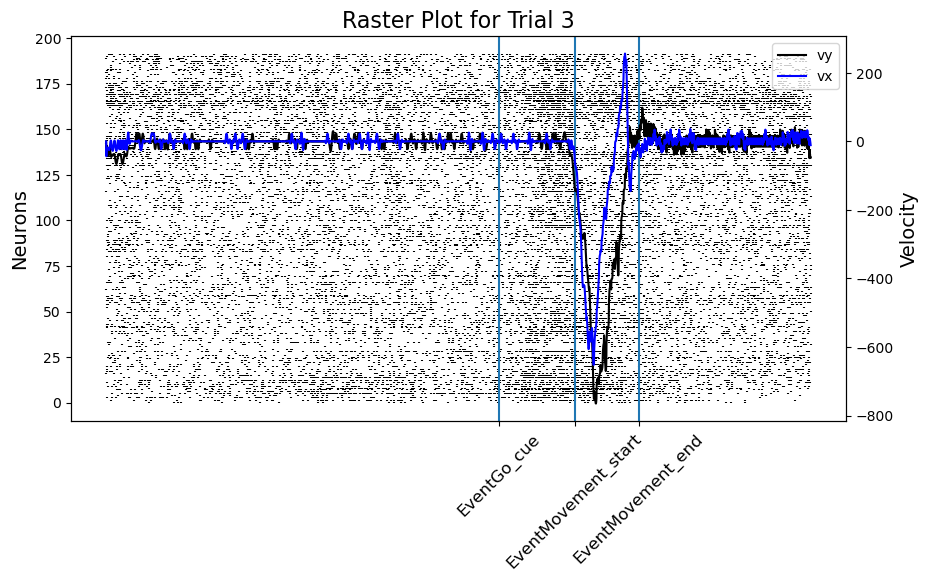

In [103]:

trial_id = 3
trial_data = df[(df['trial_id'] == trial_id) & (df['session'] == 1) & (df['animal'] == 1)]

# Select data for neurons
neuron_columns = [col for col in trial_data.columns if col.startswith('Neuron')]
neurons = neuron_columns[:]

# Identify event columns
#event_columns = ['Go_cue', 'Target_Onset', 'Bump_time']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot events per time for the selected neurons
for neuron in neurons:
    events = trial_data.index[trial_data[neuron] == 1].tolist()
    ax.eventplot(events, lineoffsets=neurons.index(neuron), linelengths=0.5, color='black')

# Plot event indications as vertical lines for each event type
colors = ['red', 'blue', 'green']
event_labels = []
event_positions = []

for idx, event_col in enumerate(event_columns):
    event_indices = trial_data.index[trial_data[event_col] == 1].tolist()
    for event_index in event_indices:
        ax.axvline(x=event_index, linestyle='-', label=event_col)
        event_positions.append(event_index)
        event_labels.append(event_col)

# Combine event labels for positions with multiple events
event_dict = {}
for pos, label in zip(event_positions, event_labels):
    if pos in event_dict:
        event_dict[pos].add(label)
    else:
        event_dict[pos] = {label}

# Sort events to ensure the ticks are in order
sorted_event_positions = sorted(event_dict.keys())
sorted_event_labels = [', '.join(event_dict[pos]) for pos in sorted_event_positions]

# Set x-axis ticks with event indications
ax.set_xticks(sorted_event_positions)
ax.set_xticklabels(sorted_event_labels, rotation=45, fontsize=12)

# Plot velocity data for y-axis
ax2 = ax.twinx()
ax2.plot(trial_data['cursor_vel_y'], color='black', label='vy')
ax2.plot(trial_data['cursor_vel_x'], color='blue', label='vx')

# Set y-axis label for velocity
ax2.set_ylabel('Velocity', fontsize=14)

# Increase font sizes for better readability
ax.set_ylabel('Neurons', fontsize=14)
ax.set_title(f'Raster Plot for Trial {trial_id}', fontsize=16)
plt.legend()
# Show plot
plt.show()
